# Предварительный анализ важностей фичей

## По итогу определяем список только важных фичей

In [4]:
import pandas as pd
import numpy as np
from catboost import CatBoost, CatBoostRegressor
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
passport = pd.read_excel('Паспорт.xls')
sovershen1 = pd.read_excel('Совершен1.xls')
epoch2 = pd.read_excel('EPOCH2.xls')
ipaq = pd.read_excel('IPAQ.xls')
dom_hoz = pd.read_excel('Дом_хоз.xls')
obsled = pd.read_excel('Обслед.xls')
ocenka_terr = pd.read_excel('Оценка_терр.xls')
pitanie = pd.read_excel('Питание.xls')
pitanie2 = pd.read_excel('Питание2.xls')
semya = pd.read_excel('Семья.xls')
sovershen2 = pd.read_excel('Совершен2.xls')
fizish_akt = pd.read_excel('Физич_акт.xls')

In [7]:
passport['Место проживания 1-город 2-село'] = passport['Место проживания 1-город 2-село'].replace(1, 'город')
passport['Место проживания 1-город 2-село'] = passport['Место проживания 1-город 2-село'].replace(2, 'село')

In [8]:
passport.index = passport['ID']
#passport = passport.drop('ID', axis=1)
sovershen1.index = sovershen1['ID']
sovershen2.index = sovershen2['ID']
epoch2.index = epoch2['ID']
ipaq.index = ipaq['ID']
dom_hoz.index = dom_hoz['ID']
ocenka_terr.index = ocenka_terr['ID']
obsled.index = obsled['ID']
pitanie.index = pitanie['ID']
pitanie2.index = pitanie2['ID']
semya.index = semya['ID']
fizish_akt.index = fizish_akt['ID']

df = passport.merge(sovershen1, left_index=True, right_index=True)
df = df.merge(sovershen2, left_index=True, right_index=True)
df = df.merge(epoch2, left_index=True, right_index=True)
df = df.merge(ipaq, left_index=True, right_index=True)
df = df.merge(dom_hoz, left_index=True, right_index=True)
df = df.merge(ocenka_terr, left_index=True, right_index=True)
df = df.merge(obsled, left_index=True, right_index=True)
df = df.merge(pitanie, left_index=True, right_index=True)
df = df.merge(pitanie2, left_index=True, right_index=True)
df = df.merge(semya, left_index=True, right_index=True)
df = df.merge(fizish_akt, left_index=True, right_index=True)


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 54-101-001-01 to 54-501-014-02
Data columns (total 859 columns):
 #   Column                                                                                                     Dtype  
---  ------                                                                                                     -----  
 0   ID_x                                                                                                       object 
 1   Место проживания 1-город 2-село                                                                            object 
 2   Дата рождения                                                                                              object 
 3   Возраст                                                                                                    int64  
 4   ID_y                                                                                                       object 
 5   Пол                            

In [10]:
passport.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 54-101-001-01 to 54-501-014-02
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               1598 non-null   object
 1   Место проживания 1-город 2-село  1598 non-null   object
 2   Дата рождения                    1597 non-null   object
 3   Возраст                          1598 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 142.4+ KB


In [11]:
sovershen1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 54-101-001-01 to 54-501-014-02
Data columns (total 101 columns):
 #   Column                                            Dtype  
---  ------                                            -----  
 0   ID                                                object 
 1   Пол                                               object 
 2   Семья                                             object 
 3   Этнос                                             object 
 4   Национальность                                    object 
 5   Религия                                           object 
 6   Образование                                       object 
 7   Профессия                                         object 
 8   Вы работаете?                                     int64  
 9   Выход на пенсию                                   int64  
 10  Прекращение работы по болезни                     int64  
 11  Сахарный диабет                                   in

In [12]:
sovershen2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 54-101-001-01 to 54-501-014-02
Data columns (total 84 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   ID                                                                                                         1598 non-null   object 
 1   Люди обычно честные                                                                                        1598 non-null   object 
 2   Если я делаю...                                                                                            1598 non-null   object 
 3   Реклама, масло                                                                                             1598 non-null   object 
 4   Реклама, мука                                           

In [13]:
sovershen2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 54-101-001-01 to 54-501-014-02
Data columns (total 84 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   ID                                                                                                         1598 non-null   object 
 1   Люди обычно честные                                                                                        1598 non-null   object 
 2   Если я делаю...                                                                                            1598 non-null   object 
 3   Реклама, масло                                                                                             1598 non-null   object 
 4   Реклама, мука                                           

In [14]:
fizish_akt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 54-101-001-01 to 54-501-014-02
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 1598 non-null   object 
 1   Профессия                          1598 non-null   object 
 2   Работа                             1598 non-null   int64  
 3   1. Тяжелый труд на работе/ дни     847 non-null    float64
 4   1. Тяжелый труд на работе/ часы    847 non-null    float64
 5   1. Тяжелый труд на работе/ минуты  847 non-null    float64
 6   1. Средние труд на работе/ дни     847 non-null    float64
 7   1. Средние труд на работе/ часы    847 non-null    float64
 8   1. Средние труд на работе/ минуты  847 non-null    float64
 9   1. Пешком на работе/ дни           847 non-null    float64
 10  1. Пешком на работе/ часы          847 non-null    float64
 11  1. Пешком на работе/ минуты        847 n

In [72]:
df1 = df[[
    'Артериальная гипертензия',
    'ОНМК',
    'Стенокардия, ИБС, инфаркт миокарда',
    'Сердечная недостаточность',
    'Прочие заболевания сердца',
    'Возраст курения',
    'Сигарет в день',
    'Сигарет лет',
    'Сигарет прекр лет',
    'Пассивное курение',
    'Возраст алког',
    'Водка, размер',
    'Профессия_y',
    'Работа',
    'Пол',
    'Семья',
    'Этнос',
    'Национальность',
    'Религия',
    'Образование',
    'Лекарство / прочие - уточнение',
    'Перечень лекарства',
    'Статус Курения',
    'Частота пасс кур',
    'Алкоголь',
    'Водка, регуляр',
    'Вино, регуляр',
    'Пиво, регуляр',
    'Самогон, регуляр',
    'Кр. вино, регуляр',
    'Люди обычно честные',	'Если я делаю...',	'Реклама, масло',	'Реклама, мука',	'Реклама, рис',
    'Реклама, безалкоголь',	'Реклама, снеки',	'Реклама, сигареты',	'Реклама, алкоголь',
    'Помощь, ОО кол-во',	'Помощь, РО кол-во',	'Помощь, семья кол-во',	'Помощь, прочее',
    'Помощь, прочее кол-во',	'36. Конфл. уточнить',	'36. Стресс уточнить',	'Стресс на работе',
    'Стресс дома',	'Стресс из-за финанс.',	'Я могу совершать обычные покупки в магазине в шаговой доступности',
    'Передвижение пешком или на велосипедев окрестях затруднено из  за скоростного режима и или кол транспорта',
    'В окрестностях практически нет мусора, загрязнения воздуха, чрезмерного уровня шума',
    'Улицы в окрестностях в ночное  время хорошо освещены',	'я встречаю др людей во время прогулои по окрестностях',
    'я могу общаться с другими людьми во время прогулки по окресности',	'высокий уровень преступности в окрестностях',
    'проблема с бездомными собаками в окрестностях',	'Расстояние Минут до магазина',	'Расстояние Минут до банка',
    'Расстояние  Минут до почты',	'Расстояние  Минут до ресторана',	'Расстояние  Минут до кафе',	'Диабет: отец',
    'Диабет: мать',	'Диабет: братья / сестры',	'ИБС: отец',	'ИБС: мать',	'ИБС: братья / сестры',	'АГ: отец',
    'АГ: мать',	'АГ: братья / сестры',	'Инсульт: отец',	'Инсульт: мать',	'Инсульт: братья / сестры',	'Рак: отец',
    'Рак: мать',	'Рак: братья / сестры','1. Молоко до 1%',	'2. Молоко до 2,5%',	'3. Молоко более 3%',
    '4. Сгущенка',	'5. Кефир до 1%',	'6. Кефир до 2,5%',	'7. Кефир более 3%',	'8. Йогурт до 1%',
    '9. Йогурт до 2,5%',	'10. Йогурт более 3%',	'11. Творог до 5%',	'12. Творог более 5%',	'13. Сырки',
    '14. Творожники',	'15. Сметана до 15%',	'16. Сметана более 20%',	'17. Сыр мягкий',	'18. Сыр до 25%',
    '19. Сыр более 25%',	'20. Маргарин',	'21. Масло бутербр.',	'22. Мороженное',	'23. Бананы',	'24. Ягоды',
    '25. Киви',	'26. Груша',	'27. Клубника',	'28. Сухофрукты',	'29. Изюм',	'30. Ананас',	'31. Яблоко',
    '32. Грейпфрут',	'33. Виноград',	'34. Мандарин',	'35. Лимон',	'36. Апельсин',	'37. Персик',
    '38. Слива',	'39. Персик в сезон',	'40. Сливы в сезон',	'41. Абрикосы в сезон',	'42. Арбуз в сезон',
    '43. Мандарины в сезон',	'44. Черешня в сезон',	'45. Клубника в сезон',	'46. Ягоды в сезон',
    '47. Капуста свежая',	'48. Капуста приготов.',	'49. Цветная капуста свежая',	'50. Цветная капуста пригот.',
    '51. Морковь свежая',	'52. Морковь пригот.',	'53. Свекла',	'54. Сельдерей',	'55. Огурец',	'56. Салат, руккол',
    '57. Петрушка, укроп',	'58. Горох свежий',	'59. Горох пригот.',	'60. Бобы',	'61. Фасоль',	'62. Чечевица',
    '63. Овощной салат',	'64. Окрошка',	'65. Винегрет',	'66. Зеленый лук свежий',	'67. Зеленый лук пригот.',
    '68. Томаты свежие',	'69. Томаты пригот.',	'70. Перец пригот.',	'71. Грибы',	'72. Капуста квашеная',
    '73. Шпинат',	'74. Кабачок',	'75. Тыква',	'76. Кукуруза',	'77. Горох конс.',	'78. Маринады',	'79. Баклажан',
    '80. Брокколи',	'81. Тыква в сезон',	'82. Кабачок в сезон',	'83. Перец в сезон',	'84. Редис в сезон',
    '85. Грибы в сезон',	'86. Капуста квашеная в сезон',	'87. Яйца',	'88. Курица с кожей',	'89. Курица без кожи',
    '90. Мясо в сложном блюде',	'91. Туш. Говядина, гуляш',	'92. Стейк из говядины',	'93. Котлета',
    '94. Свинина тушеная',	'95. Свинина жареная',	'96. Баранина',	'97. Рыба жареная, суп',
    '98. Рыба вяленая, соленая',	'99. Морепродукты',	'100. Пирожки с мясом',	'101. Куринный рулет',
    '102. Сосиськи',	'103. Колбаса вареная',	'104. Колбаса копченая',	'105. Буженина, окорок, ветчина',
    '106. Сало',	'107. Субпродукты',	'108. Картофель',	'109. Паста',	'110. Белый хлеб',	'111. Черный хлеб',
    '112. Серый хлеб',	'113. Рис',	'114. Картофель во фритюре',	'115. Вареники',	'116. Пельмени',
    '117. Пицца',	'118. Гречневая крупа',	'119. Манная каша',	'120. Хлопья',	'121. Овсянная круппа',
    '122. Пшено',	'123. Прочие злаки',	'124. Борщ',	'125. Бульон',	'126. Рассольник',	'127. Суп с овощами',
    '128. Грибной суп',	'129. Гороховый суп',	'130. Куринный суп с лапшой',	'131. Соки',	'132. Кофе',
    '133. Чай',	'134. Вода',	'135. Газировка',	'136. Безалкогольные напитки',	'137. Пиво',	'138. Вино',
    '139. Водка, коньяк, ликер',	'140. Квас',	'141. Блины',	'142. Булочка',	'143. Сушки, баранки',
    '144. Конфеты шоколад.',	'145. Конфеты карамель',	'146. Торт',	'147. Халва',	'148. Печенье',
    '149. Мед, джем, варенье',	'150. Шоколад',	'151. Бисквит',	'152. Пряники',	'153. Пастила, зефир',	'154. Вафли',
    '155. Чипсы',	'156. Сухарики',	'157. Орехи',	'158. Майонез',	'159. Кетчуп',	'160. Соевый соус',	'163. Витамин А',
    '164. Витамин D',	'165. Витамин Е',	'166. Витамин В',	'167. Витамин C',	'168. Кальций',	'169. Железо',
    '170. Цинк',	'171. Йод',	'172. Магний',	'173. Рыбий жир',	'174. Поливитамины',	'175. Соевое масло',
    '176. Кукурузное масло',	'177. Растительное масло',	'178. Подсолнечное масло',	'179. Рапсовое масло',
    '180. Хлопковое масло',	'181. Оливковое масло',	'182. Сливочное масло',	'183. Питание в ресторанах',
    '184. Добавление соли','Время бакалея',	'Время одежда',	'Время фрукты',	'Время ресторан',	'Время банк',
    'Время видеопрокат',	'Время аптека',	'Время до работы',	'Время остановка',	'Время парк',	'Вопрос B1',
    'Вопрос B2',	'Вопрос B3',	'Вопрос B4',	'Вопрос C1',	'Вопрос C2',	'Вопрос C3',	'Вопрос D1',
    'Вопрос D2',	'Вопрос D3',	'Вопрос E1',	'Вопрос E2',	'Вопрос E3',	'Вопрос F1',	'Вопрос F2',
    'Вопрос F3',	'Вопрос G1',	'Вопрос G2',	'Вопрос G3',	'Вопрос Ha',	'Вопрос Hb',	'Вопрос Hc',
    'Вопрос Hd',	'Вопрос He',	'Вопрос Hf',	'Вопрос Hg',	'Вопрос Hh',	'Вопрос Hi',	'Вопрос Hj',
    'Уточнение',	'Аномальный ритм',	'Другие аномалии','Тип крыши',	'Тип топлива',	'Источник тепла',
    'Источник воды',	'Воды нет, мин',	'Место для пригот пищи',	'Вытяжка',	'Вопрос 10a/ месяц',
    'Вопрос 10a/ 5 лет',	'Вопрос 10b/ месяц',	'Вопрос 10b/ 5 лет',	'Вопрос 10c/ месяц',	'Вопрос 10c/ 5 лет',
    'Др уточнить',	'Часть дохода на еду',	'Вопрос 13',	'Достаток по срав с друг',	'Тип жилья',
    '1. Курят / больница',	'1. Курят / остановка',	'1. Курят / ресторан',	'1. Курят / бар',	'1. Курят / библиотека',
    '1. Курят / правительство',	'1. Курят / работа',	'1. Курят / дом',	'2. Могут курить / больница',
    '2. Могут курить / остановка',	'2. Могут курить / ресторан',	'2. Могут курить / бар',	'2. Могут курить / библиотека',
    '2. Могут курить / правительство',	'2. Могут курить / работа',	'2. Могут курить / дом',	'5. Покупка подростками сигарет',
    '6а. Одобрение курящих детей',	'6b. Одобрение курящих подростков',	'6с. Одобрение курящих женщин',
    '6d. Одобрение курящих мужчин',
    '6е. Одобрение подростков биди',	'6f. Одобрение женщин биди',	'6g. Одобрение мужчин биди',
    '6h. Одобрение подростков кальян',
    '6i. Одобрение женщин кальян',	'6j. Одобрение мужчин кальян',	'7а. Запрет курения в общ. местах',
    '7b. Запрет рекламы сигарет',	'7с. Предупреждение на пачках сигарет',	'7d. Запрет продаж сигарет детям',
    '7е. Запрет курения детьми',	'7f. Ограничение продаж сигарет',	'7g. Программы отказа от курения',
    '8а. Курение/ ХЗЛ',	'8b. Курение/заболевания сердца',	'8с. Курение/диабет',	'8d. Курение/инсульт',
    '8е. Курение/артрит',	'8f. Курение/рак легких',	'8g. Курение/Рак горла',	'8h. Курение/пассивные курильщики',
    '8i. Курение/преждевременные роды',	'8j. Курение/дети с малым весом',	'16. Общ. Давление/ а',	'16. Общ. Давление/ b',
    '16. Общ. Давление/ c',	'16. Общ. Давление/ d',	'16. Общ. Давление/ e',	'16. Общ. Давление/ f',
    '17. Известно ли о наличии… / a',	'17. Известно ли о наличии… / b',	'17. Известно ли о наличии… / c',
    '17. Известно ли о наличии… / d',	'17. Известно ли о наличии… / e',	'17. Известно ли о наличии… / f',
    '17. Известно ли о наличии… / g',	'17. Известно ли о наличии… / h',	'18. ССЗ / увелич. Физ. активности',
    '18. ССЗ / фрукты',	'18. ССЗ / овощи',	'18. ССЗ / мясо',	'18. ССЗ / кофе',	'18. ССЗ / молочные продукты',
    '18. ССЗ / рыба',	'18. ССЗ / курение',	'18. ССЗ / снижение жиров',	'18. ССЗ / снижение соли',
    '18. ССЗ / увеличение веса',	'19. Маркировка / местные продукты',	'19. Маркировка / импортные продукты',
    '20. Замечания курящим детям',	'20. Замечания курящим подросткам',	'21. Замечания нездоровой еды / дети',
    '21. Замечания нездоровая еда / подростки',	'22. Советы физ. активности / дети',
    '22. Советы физ. активности / подростки',	'23. Помощь соседям',	'27. Рекомендации по отказу от курения',
    '29. Уровень образования',	'33. Как добираетесь до магазина',	'35. Адрес магазина',	'36. Код магазина EPOCH 1',
    '39а. Место работы',	'39b. Индекс работы',	'40. Как добираетесь до работы'
]]

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 54-101-001-01 to 54-501-014-02
Columns: 405 entries, Артериальная гипертензия to 40. Как добираетесь до работы
dtypes: float64(6), int64(7), object(392)
memory usage: 5.0+ MB


In [74]:
df1.columns

Index(['Артериальная гипертензия', 'ОНМК',
       'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность',
       'Прочие заболевания сердца', 'Возраст курения', 'Сигарет в день',
       'Сигарет лет', 'Сигарет прекр лет', 'Пассивное курение',
       ...
       '22. Советы физ. активности / подростки', '23. Помощь соседям',
       '27. Рекомендации по отказу от курения', '29. Уровень образования',
       '33. Как добираетесь до магазина', '35. Адрес магазина',
       '36. Код магазина EPOCH 1', '39а. Место работы', '39b. Индекс работы',
       '40. Как добираетесь до работы'],
      dtype='object', length=405)

In [91]:
#df1['Водка, регуляр'] = df1['Водка, регуляр'].apply(str) 
#df1['Статус Курения'] = df1['Статус Курения'].apply(str)
#df1['Алкоголь'] = df1['Алкоголь'].apply(str)
#df1['Работа'] = df1['Работа'].apply(str)

#df1['Лекарство / прочие - уточнение'] = df1['Лекарство / прочие - уточнение'].apply(str)
#df1['Перечень лекарства'] = df1['Перечень лекарства'].apply(str)
#df1['Частота пасс кур'] = df1['Частота пасс кур'].apply(str)
#df1['Вино, регуляр'] = df1['Вино, регуляр'].apply(str)
#df1['Пиво, регуляр'] = df1['Пиво, регуляр'].apply(str)
#df1['Самогон, регуляр'] = df1['Самогон, регуляр'].apply(str)
#df1['Кр. вино, регуляр'] = df1['Кр. вино, регуляр'].apply(str)
#df1['Пол'] = df1['Пол'].apply(str)

columns = ['Профессия_y', 'Работа', 'Пол',
       'Семья', 'Этнос', 'Национальность', 'Религия', 'Образование',
       'Лекарство / прочие - уточнение', 'Перечень лекарства',
       'Статус Курения', 'Частота пасс кур', 'Алкоголь', 'Водка, регуляр',
       'Вино, регуляр', 'Пиво, регуляр', 'Самогон, регуляр',
       'Кр. вино, регуляр','Люди обычно честные',	'Если я делаю...',	'Реклама, масло',	'Реклама, мука',	'Реклама, рис',
    'Реклама, безалкоголь',	'Реклама, снеки',	'Реклама, сигареты',	'Реклама, алкоголь',
    'Помощь, ОО кол-во',	'Помощь, РО кол-во',	'Помощь, семья кол-во',	'Помощь, прочее',
    'Помощь, прочее кол-во',	'36. Конфл. уточнить',	'36. Стресс уточнить',	'Стресс на работе',
    'Стресс дома',	'Стресс из-за финанс.',	'Я могу совершать обычные покупки в магазине в шаговой доступности',
    'Передвижение пешком или на велосипедев окрестях затруднено из  за скоростного режима и или кол транспорта',
    'В окрестностях практически нет мусора, загрязнения воздуха, чрезмерного уровня шума',
    'Улицы в окрестностях в ночное  время хорошо освещены',	'я встречаю др людей во время прогулои по окрестностях',
    'я могу общаться с другими людьми во время прогулки по окресности',	'высокий уровень преступности в окрестностях',
    'проблема с бездомными собаками в окрестностях',	'Расстояние Минут до магазина',	'Расстояние Минут до банка',
    'Расстояние  Минут до почты',	'Расстояние  Минут до ресторана',	'Расстояние  Минут до кафе',	'Диабет: отец',
    'Диабет: мать',	'Диабет: братья / сестры',	'ИБС: отец',	'ИБС: мать',	'ИБС: братья / сестры',	'АГ: отец',
    'АГ: мать',	'АГ: братья / сестры',	'Инсульт: отец',	'Инсульт: мать',	'Инсульт: братья / сестры',	'Рак: отец',
    'Рак: мать',	'Рак: братья / сестры','1. Молоко до 1%',	'2. Молоко до 2,5%',	'3. Молоко более 3%',
    '4. Сгущенка',	'5. Кефир до 1%',	'6. Кефир до 2,5%',	'7. Кефир более 3%',	'8. Йогурт до 1%',
    '9. Йогурт до 2,5%',	'10. Йогурт более 3%',	'11. Творог до 5%',	'12. Творог более 5%',	'13. Сырки',
    '14. Творожники',	'15. Сметана до 15%',	'16. Сметана более 20%',	'17. Сыр мягкий',	'18. Сыр до 25%',
    '19. Сыр более 25%',	'20. Маргарин',	'21. Масло бутербр.',	'22. Мороженное',	'23. Бананы',	'24. Ягоды',
    '25. Киви',	'26. Груша',	'27. Клубника',	'28. Сухофрукты',	'29. Изюм',	'30. Ананас',	'31. Яблоко',
    '32. Грейпфрут',	'33. Виноград',	'34. Мандарин',	'35. Лимон',	'36. Апельсин',	'37. Персик',
    '38. Слива',	'39. Персик в сезон',	'40. Сливы в сезон',	'41. Абрикосы в сезон',	'42. Арбуз в сезон',
    '43. Мандарины в сезон',	'44. Черешня в сезон',	'45. Клубника в сезон',	'46. Ягоды в сезон',
    '47. Капуста свежая',	'48. Капуста приготов.',	'49. Цветная капуста свежая',	'50. Цветная капуста пригот.',
    '51. Морковь свежая',	'52. Морковь пригот.',	'53. Свекла',	'54. Сельдерей',	'55. Огурец',	'56. Салат, руккол',
    '57. Петрушка, укроп',	'58. Горох свежий',	'59. Горох пригот.',	'60. Бобы',	'61. Фасоль',	'62. Чечевица',
    '63. Овощной салат',	'64. Окрошка',	'65. Винегрет',	'66. Зеленый лук свежий',	'67. Зеленый лук пригот.',
    '68. Томаты свежие',	'69. Томаты пригот.',	'70. Перец пригот.',	'71. Грибы',	'72. Капуста квашеная',
    '73. Шпинат',	'74. Кабачок',	'75. Тыква',	'76. Кукуруза',	'77. Горох конс.',	'78. Маринады',	'79. Баклажан',
    '80. Брокколи',	'81. Тыква в сезон',	'82. Кабачок в сезон',	'83. Перец в сезон',	'84. Редис в сезон',
    '85. Грибы в сезон',	'86. Капуста квашеная в сезон',	'87. Яйца',	'88. Курица с кожей',	'89. Курица без кожи',
    '90. Мясо в сложном блюде',	'91. Туш. Говядина, гуляш',	'92. Стейк из говядины',	'93. Котлета',
    '94. Свинина тушеная',	'95. Свинина жареная',	'96. Баранина',	'97. Рыба жареная, суп',
    '98. Рыба вяленая, соленая',	'99. Морепродукты',	'100. Пирожки с мясом',	'101. Куринный рулет',
    '102. Сосиськи',	'103. Колбаса вареная',	'104. Колбаса копченая',	'105. Буженина, окорок, ветчина',
    '106. Сало',	'107. Субпродукты',	'108. Картофель',	'109. Паста',	'110. Белый хлеб',	'111. Черный хлеб',
    '112. Серый хлеб',	'113. Рис',	'114. Картофель во фритюре',	'115. Вареники',	'116. Пельмени',
    '117. Пицца',	'118. Гречневая крупа',	'119. Манная каша',	'120. Хлопья',	'121. Овсянная круппа',
    '122. Пшено',	'123. Прочие злаки',	'124. Борщ',	'125. Бульон',	'126. Рассольник',	'127. Суп с овощами',
    '128. Грибной суп',	'129. Гороховый суп',	'130. Куринный суп с лапшой',	'131. Соки',	'132. Кофе',
    '133. Чай',	'134. Вода',	'135. Газировка',	'136. Безалкогольные напитки',	'137. Пиво',	'138. Вино',
    '139. Водка, коньяк, ликер',	'140. Квас',	'141. Блины',	'142. Булочка',	'143. Сушки, баранки',
    '144. Конфеты шоколад.',	'145. Конфеты карамель',	'146. Торт',	'147. Халва',	'148. Печенье',
    '149. Мед, джем, варенье',	'150. Шоколад',	'151. Бисквит',	'152. Пряники',	'153. Пастила, зефир',	'154. Вафли',
    '155. Чипсы',	'156. Сухарики',	'157. Орехи',	'158. Майонез',	'159. Кетчуп',	'160. Соевый соус',	'163. Витамин А',
    '164. Витамин D',	'165. Витамин Е',	'166. Витамин В',	'167. Витамин C',	'168. Кальций',	'169. Железо',
    '170. Цинк',	'171. Йод',	'172. Магний',	'173. Рыбий жир',	'174. Поливитамины',	'175. Соевое масло',
    '176. Кукурузное масло',	'177. Растительное масло',	'178. Подсолнечное масло',	'179. Рапсовое масло',
    '180. Хлопковое масло',	'181. Оливковое масло',	'182. Сливочное масло',	'183. Питание в ресторанах',
    '184. Добавление соли','Время бакалея',	'Время одежда',	'Время фрукты',	'Время ресторан',	'Время банк',
    'Время видеопрокат',	'Время аптека',	'Время до работы',	'Время остановка',	'Время парк',	'Вопрос B1',
    'Вопрос B2',	'Вопрос B3',	'Вопрос B4',	'Вопрос C1',	'Вопрос C2',	'Вопрос C3',	'Вопрос D1',
    'Вопрос D2',	'Вопрос D3',	'Вопрос E1',	'Вопрос E2',	'Вопрос E3',	'Вопрос F1',	'Вопрос F2',
    'Вопрос F3',	'Вопрос G1',	'Вопрос G2',	'Вопрос G3',	'Вопрос Ha',	'Вопрос Hb',	'Вопрос Hc',
    'Вопрос Hd',	'Вопрос He',	'Вопрос Hf',	'Вопрос Hg',	'Вопрос Hh',	'Вопрос Hi',	'Вопрос Hj',
    'Уточнение',	'Аномальный ритм',	'Другие аномалии','Тип крыши',	'Тип топлива',	'Источник тепла',
    'Источник воды',	'Воды нет, мин',	'Место для пригот пищи',	'Вытяжка',	'Вопрос 10a/ месяц',
    'Вопрос 10a/ 5 лет',	'Вопрос 10b/ месяц',	'Вопрос 10b/ 5 лет',	'Вопрос 10c/ месяц',	'Вопрос 10c/ 5 лет',
    'Др уточнить',	'Часть дохода на еду',	'Вопрос 13',	'Достаток по срав с друг',	'Тип жилья',
    '1. Курят / больница',	'1. Курят / остановка',	'1. Курят / ресторан',	'1. Курят / бар',	'1. Курят / библиотека',
    '1. Курят / правительство',	'1. Курят / работа',	'1. Курят / дом',	'2. Могут курить / больница',
    '2. Могут курить / остановка',	'2. Могут курить / ресторан',	'2. Могут курить / бар',	'2. Могут курить / библиотека',
    '2. Могут курить / правительство',	'2. Могут курить / работа',	'2. Могут курить / дом',	'5. Покупка подростками сигарет',
    '6а. Одобрение курящих детей',	'6b. Одобрение курящих подростков',	'6с. Одобрение курящих женщин',
    '6d. Одобрение курящих мужчин',
    '6е. Одобрение подростков биди',	'6f. Одобрение женщин биди',	'6g. Одобрение мужчин биди',
    '6h. Одобрение подростков кальян',
    '6i. Одобрение женщин кальян',	'6j. Одобрение мужчин кальян',	'7а. Запрет курения в общ. местах',
    '7b. Запрет рекламы сигарет',	'7с. Предупреждение на пачках сигарет',	'7d. Запрет продаж сигарет детям',
    '7е. Запрет курения детьми',	'7f. Ограничение продаж сигарет',	'7g. Программы отказа от курения',
    '8а. Курение/ ХЗЛ',	'8b. Курение/заболевания сердца',	'8с. Курение/диабет',	'8d. Курение/инсульт',
    '8е. Курение/артрит',	'8f. Курение/рак легких',	'8g. Курение/Рак горла',	'8h. Курение/пассивные курильщики',
    '8i. Курение/преждевременные роды',	'8j. Курение/дети с малым весом',	'16. Общ. Давление/ а',	'16. Общ. Давление/ b',
    '16. Общ. Давление/ c',	'16. Общ. Давление/ d',	'16. Общ. Давление/ e',	'16. Общ. Давление/ f',
    '17. Известно ли о наличии… / a',	'17. Известно ли о наличии… / b',	'17. Известно ли о наличии… / c',
    '17. Известно ли о наличии… / d',	'17. Известно ли о наличии… / e',	'17. Известно ли о наличии… / f',
    '17. Известно ли о наличии… / g',	'17. Известно ли о наличии… / h',	'18. ССЗ / увелич. Физ. активности',
    '18. ССЗ / фрукты',	'18. ССЗ / овощи',	'18. ССЗ / мясо',	'18. ССЗ / кофе',	'18. ССЗ / молочные продукты',
    '18. ССЗ / рыба',	'18. ССЗ / курение',	'18. ССЗ / снижение жиров',	'18. ССЗ / снижение соли',
    '18. ССЗ / увеличение веса',	'19. Маркировка / местные продукты',	'19. Маркировка / импортные продукты',
    '20. Замечания курящим детям',	'20. Замечания курящим подросткам',	'21. Замечания нездоровой еды / дети',
    '21. Замечания нездоровая еда / подростки',	'22. Советы физ. активности / дети',
    '22. Советы физ. активности / подростки',	'23. Помощь соседям',	'27. Рекомендации по отказу от курения',
    '29. Уровень образования',	'33. Как добираетесь до магазина',	'35. Адрес магазина',	'36. Код магазина EPOCH 1',
    '39а. Место работы',	'39b. Индекс работы',	'40. Как добираетесь до работы']

for col in columns:
    df1[col] = df1[col].apply(str)

<ipython-input-91-ff66a49fd183>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].apply(str)


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 54-101-001-01 to 54-501-014-02
Columns: 405 entries, Артериальная гипертензия to 40. Как добираетесь до работы
dtypes: float64(6), int64(6), object(393)
memory usage: 5.0+ MB


In [93]:
df1.head(5)

,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Возраст курения,Сигарет в день,Сигарет лет,Сигарет прекр лет,Пассивное курение,Возраст алког,"Водка, размер",Профессия_y,Работа,Пол,Семья,Этнос,Национальность,Религия,Образование,Лекарство / прочие - уточнение,Перечень лекарства,Статус Курения,Частота пасс кур,Алкоголь,"Водка, регуляр","Вино, регуляр","Пиво, регуляр","Самогон, регуляр","Кр. вино, регуляр",Люди обычно честные,Если я делаю...,"Реклама, масло","Реклама, мука","Реклама, рис","Реклама, безалкоголь","Реклама, снеки","Реклама, сигареты","Реклама, алкоголь","Помощь, ОО кол-во","Помощь, РО кол-во","Помощь, семья кол-во","Помощь, прочее","Помощь, прочее кол-во",36. Конфл. уточнить,36. Стресс уточнить,Стресс на работе,Стресс дома,Стресс из-за финанс.,Я могу совершать обычные покупки в магазине в шаговой доступности,Передвижение пешком или на велосипедев окрестях затруднено из за скоростного режима и или кол транспорта,"В окрестностях практически нет мусора, загрязнения воздуха, чрезмерного уровня шума",Улицы в окрестностях в ночное время хорошо освещены,я встречаю др людей во время прогулои по окрестностях,я могу общаться с другими людьми во время прогулки по окресности,высокий уровень преступности в окрестностях,проблема с бездомными собаками в окрестностях,Расстояние Минут до магазина,Расстояние Минут до банка,Расстояние Минут до почты,Расстояние Минут до ресторана,Расстояние Минут до кафе,Диабет: отец,Диабет: мать,Диабет: братья / сестры,ИБС: отец,ИБС: мать,ИБС: братья / сестры,АГ: отец,АГ: мать,АГ: братья / сестры,Инсульт: отец,Инсульт: мать,Инсульт: братья / сестры,Рак: отец,Рак: мать,Рак: братья / сестры,1. Молоко до 1%,"2. Молоко до 2,5%",3. Молоко более 3%,4. Сгущенка,5. Кефир до 1%,"6. Кефир до 2,5%",7. Кефир более 3%,8. Йогурт до 1%,"9. Йогурт до 2,5%",10. Йогурт более 3%,11. Творог до 5%,12. Творог более 5%,13. Сырки,14. Творожники,15. Сметана до 15%,16. Сметана более 20%,17. Сыр мягкий,18. Сыр до 25%,19. Сыр более 25%,20. Маргарин,21. Масло бутербр.,22. Мороженное,23. Бананы,24. Ягоды,25. Киви,26. Груша,27. Клубника,28. Сухофрукты,29. Изюм,30. Ананас,31. Яблоко,32. Грейпфрут,33. Виноград,34. Мандарин,35. Лимон,36. Апельсин,37. Персик,38. Слива,39. Персик в сезон,40. Сливы в сезон,41. Абрикосы в сезон,42. Арбуз в сезон,43. Мандарины в сезон,44. Черешня в сезон,45. Клубника в сезон,46. Ягоды в сезон,47. Капуста свежая,48. Капуста приготов.,49. Цветная капуста свежая,50. Цветная капуста пригот.,51. Морковь свежая,52. Морковь пригот.,53. Свекла,54. Сельдерей,55. Огурец,"56. Салат, руккол","57. Петрушка, укроп",58. Горох свежий,59. Горох пригот.,60. Бобы,61. Фасоль,62. Чечевица,63. Овощной салат,64. Окрошка,65. Винегрет,66. Зеленый лук свежий,67. Зеленый лук пригот.,68. Томаты свежие,69. Томаты пригот.,70. Перец пригот.,71. Грибы,72. Капуста квашеная,73. Шпинат,74. Кабачок,75. Тыква,76. Кукуруза,77. Горох конс.,78. Маринады,79. Баклажан,80. Брокколи,81. Тыква в сезон,82. Кабачок в сезон,83. Перец в сезон,84. Редис в сезон,85. Грибы в сезон,86. Капуста квашеная в сезон,87. Яйца,88. Курица с кожей,89. Курица без кожи,90. Мясо в сложном блюде,"91. Туш. Говядина, гуляш",92. Стейк из говядины,93. Котлета,94. Свинина тушеная,95. Свинина жареная,96. Баранина,"97. Рыба жареная, суп","98. Рыба вяленая, соленая",99. Морепродукты,100. Пирожки с мясом,101. Куринный рулет,102. Сосиськи,103. Колбаса вареная,104. Колбаса копченая,"105. Буженина, окорок, ветчина",106. Сало,107. Субпродукты,108. Картофель,109. Паста,110. Белый хлеб,111. Черный хлеб,112. Серый хлеб,113. Рис,114. Картофель во фритюре,115. Вареники,116. Пельмени,117. Пицца,118. Гречневая крупа,119. Манная каша,120. Хлопья,121. Овсянная круппа,122. Пшено,123. Прочие злаки,124. Борщ,125. Бульон,126. Рассольник,127. Суп с овощами,128. Грибной суп,129. Гороховый суп,130. Куринный суп с лапшой,131. Соки,132. Кофе,133. Чай,134. Вода,135. Газировка,136. Безалкогольные напитки,137. Пиво,138. Вино,"139. Водк

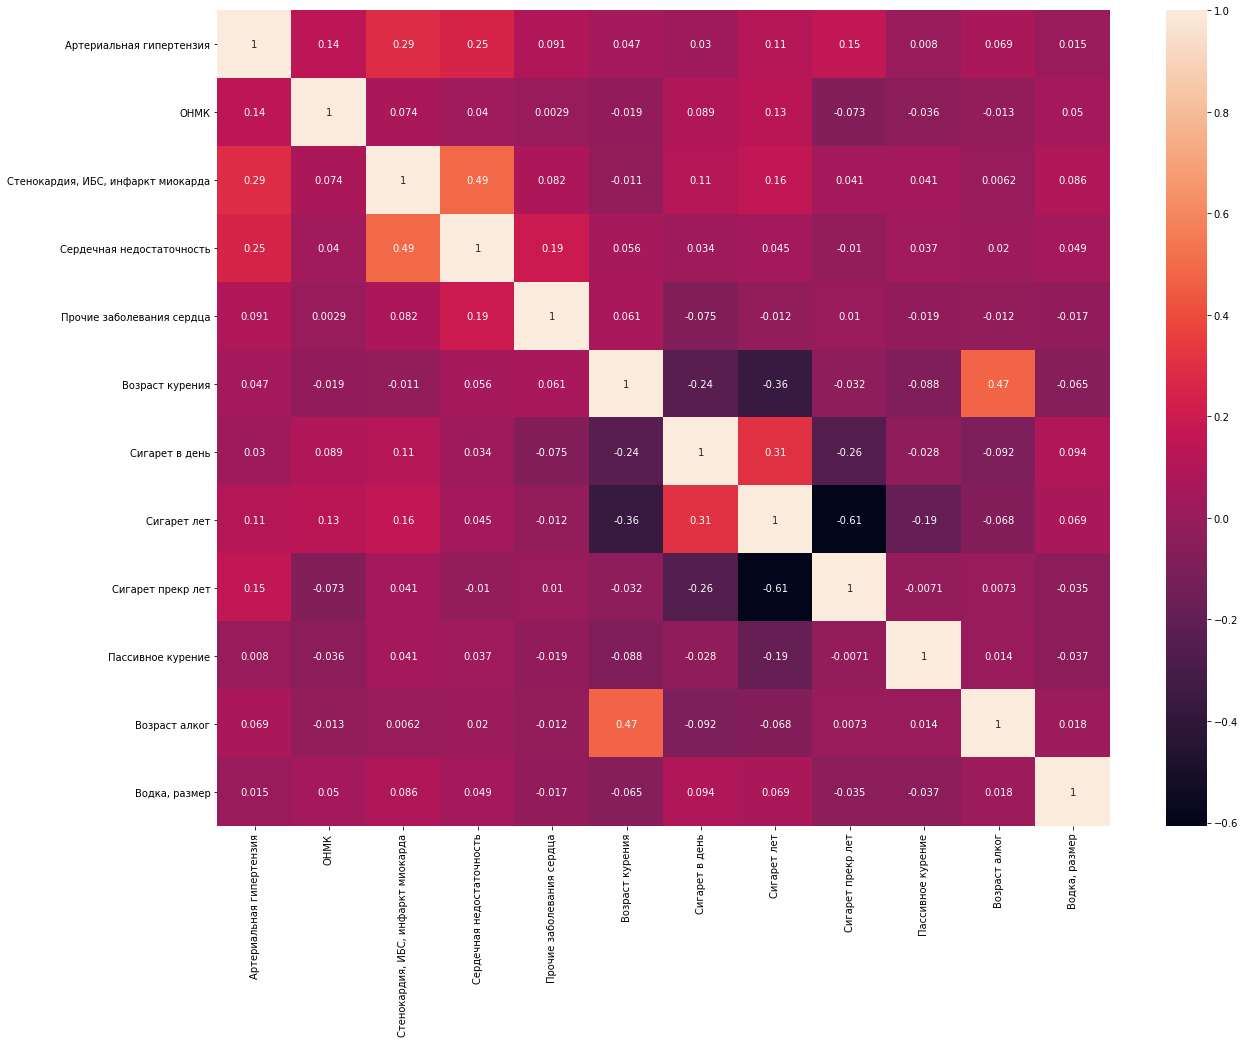

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cm = df1.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cm, annot=True);

In [95]:
# Делим выборку на train и test
train_set, test_set = np.split(df1, [int(.67 * len(df1))])

In [96]:
#Матрица для train
X_train = train_set.drop('ОНМК', axis=1)
y_train = train_set['ОНМК']
#Матрица для test
X_test = test_set.drop('ОНМК', axis=1)
y_test = test_set['ОНМК']

In [97]:
# функция, которая вычисляет MAPE
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    mape = (perc_error_abs.sum() / len(y_true))
    return mape

In [98]:
# Собственно сама сеть
final_model = CatBoostRegressor(iterations=100,
                                depth=16,
                                learning_rate=0.3,
                                loss_function='MAPE',
                                cat_features=[
                                   'Профессия_y', 'Работа', 'Пол',
       'Семья', 'Этнос', 'Национальность', 'Религия', 'Образование',
       'Лекарство / прочие - уточнение', 'Перечень лекарства',
       'Статус Курения', 'Частота пасс кур', 'Алкоголь', 'Водка, регуляр',
       'Вино, регуляр', 'Пиво, регуляр', 'Самогон, регуляр',
       'Кр. вино, регуляр','Люди обычно честные',	'Если я делаю...',	'Реклама, масло',	'Реклама, мука',	'Реклама, рис',
    'Реклама, безалкоголь',	'Реклама, снеки',	'Реклама, сигареты',	'Реклама, алкоголь',
    'Помощь, ОО кол-во',	'Помощь, РО кол-во',	'Помощь, семья кол-во',	'Помощь, прочее',
    'Помощь, прочее кол-во',	'36. Конфл. уточнить',	'36. Стресс уточнить',	'Стресс на работе',
    'Стресс дома',	'Стресс из-за финанс.',	'Я могу совершать обычные покупки в магазине в шаговой доступности',
    'Передвижение пешком или на велосипедев окрестях затруднено из  за скоростного режима и или кол транспорта',
    'В окрестностях практически нет мусора, загрязнения воздуха, чрезмерного уровня шума',
    'Улицы в окрестностях в ночное  время хорошо освещены',	'я встречаю др людей во время прогулои по окрестностях',
    'я могу общаться с другими людьми во время прогулки по окресности',	'высокий уровень преступности в окрестностях',
    'проблема с бездомными собаками в окрестностях',	'Расстояние Минут до магазина',	'Расстояние Минут до банка',
    'Расстояние  Минут до почты',	'Расстояние  Минут до ресторана',	'Расстояние  Минут до кафе',	'Диабет: отец',
    'Диабет: мать',	'Диабет: братья / сестры',	'ИБС: отец',	'ИБС: мать',	'ИБС: братья / сестры',	'АГ: отец',
    'АГ: мать',	'АГ: братья / сестры',	'Инсульт: отец',	'Инсульт: мать',	'Инсульт: братья / сестры',	'Рак: отец',
    'Рак: мать',	'Рак: братья / сестры','1. Молоко до 1%',	'2. Молоко до 2,5%',	'3. Молоко более 3%',
    '4. Сгущенка',	'5. Кефир до 1%',	'6. Кефир до 2,5%',	'7. Кефир более 3%',	'8. Йогурт до 1%',
    '9. Йогурт до 2,5%',	'10. Йогурт более 3%',	'11. Творог до 5%',	'12. Творог более 5%',	'13. Сырки',
    '14. Творожники',	'15. Сметана до 15%',	'16. Сметана более 20%',	'17. Сыр мягкий',	'18. Сыр до 25%',
    '19. Сыр более 25%',	'20. Маргарин',	'21. Масло бутербр.',	'22. Мороженное',	'23. Бананы',	'24. Ягоды',
    '25. Киви',	'26. Груша',	'27. Клубника',	'28. Сухофрукты',	'29. Изюм',	'30. Ананас',	'31. Яблоко',
    '32. Грейпфрут',	'33. Виноград',	'34. Мандарин',	'35. Лимон',	'36. Апельсин',	'37. Персик',
    '38. Слива',	'39. Персик в сезон',	'40. Сливы в сезон',	'41. Абрикосы в сезон',	'42. Арбуз в сезон',
    '43. Мандарины в сезон',	'44. Черешня в сезон',	'45. Клубника в сезон',	'46. Ягоды в сезон',
    '47. Капуста свежая',	'48. Капуста приготов.',	'49. Цветная капуста свежая',	'50. Цветная капуста пригот.',
    '51. Морковь свежая',	'52. Морковь пригот.',	'53. Свекла',	'54. Сельдерей',	'55. Огурец',	'56. Салат, руккол',
    '57. Петрушка, укроп',	'58. Горох свежий',	'59. Горох пригот.',	'60. Бобы',	'61. Фасоль',	'62. Чечевица',
    '63. Овощной салат',	'64. Окрошка',	'65. Винегрет',	'66. Зеленый лук свежий',	'67. Зеленый лук пригот.',
    '68. Томаты свежие',	'69. Томаты пригот.',	'70. Перец пригот.',	'71. Грибы',	'72. Капуста квашеная',
    '73. Шпинат',	'74. Кабачок',	'75. Тыква',	'76. Кукуруза',	'77. Горох конс.',	'78. Маринады',	'79. Баклажан',
    '80. Брокколи',	'81. Тыква в сезон',	'82. Кабачок в сезон',	'83. Перец в сезон',	'84. Редис в сезон',
    '85. Грибы в сезон',	'86. Капуста квашеная в сезон',	'87. Яйца',	'88. Курица с кожей',	'89. Курица без кожи',
    '90. Мясо в сложном блюде',	'91. Туш. Говядина, гуляш',	'92. Стейк из говядины',	'93. Котлета',
    '94. Свинина тушеная',	'95. Свинина жареная',	'96. Баранина',	'97. Рыба жареная, суп',
    '98. Рыба вяленая, соленая',	'99. Морепродукты',	'100. Пирожки с мясом',	'101. Куринный рулет',
    '102. Сосиськи',	'103. Колбаса вареная',	'104. Колбаса копченая',	'105. Буженина, окорок, ветчина',
    '106. Сало',	'107. Субпродукты',	'108. Картофель',	'109. Паста',	'110. Белый хлеб',	'111. Черный хлеб',
    '112. Серый хлеб',	'113. Рис',	'114. Картофель во фритюре',	'115. Вареники',	'116. Пельмени',
    '117. Пицца',	'118. Гречневая крупа',	'119. Манная каша',	'120. Хлопья',	'121. Овсянная круппа',
    '122. Пшено',	'123. Прочие злаки',	'124. Борщ',	'125. Бульон',	'126. Рассольник',	'127. Суп с овощами',
    '128. Грибной суп',	'129. Гороховый суп',	'130. Куринный суп с лапшой',	'131. Соки',	'132. Кофе',
    '133. Чай',	'134. Вода',	'135. Газировка',	'136. Безалкогольные напитки',	'137. Пиво',	'138. Вино',
    '139. Водка, коньяк, ликер',	'140. Квас',	'141. Блины',	'142. Булочка',	'143. Сушки, баранки',
    '144. Конфеты шоколад.',	'145. Конфеты карамель',	'146. Торт',	'147. Халва',	'148. Печенье',
    '149. Мед, джем, варенье',	'150. Шоколад',	'151. Бисквит',	'152. Пряники',	'153. Пастила, зефир',	'154. Вафли',
    '155. Чипсы',	'156. Сухарики',	'157. Орехи',	'158. Майонез',	'159. Кетчуп',	'160. Соевый соус',	'163. Витамин А',
    '164. Витамин D',	'165. Витамин Е',	'166. Витамин В',	'167. Витамин C',	'168. Кальций',	'169. Железо',
    '170. Цинк',	'171. Йод',	'172. Магний',	'173. Рыбий жир',	'174. Поливитамины',	'175. Соевое масло',
    '176. Кукурузное масло',	'177. Растительное масло',	'178. Подсолнечное масло',	'179. Рапсовое масло',
    '180. Хлопковое масло',	'181. Оливковое масло',	'182. Сливочное масло',	'183. Питание в ресторанах',
    '184. Добавление соли','Время бакалея',	'Время одежда',	'Время фрукты',	'Время ресторан',	'Время банк',
    'Время видеопрокат',	'Время аптека',	'Время до работы',	'Время остановка',	'Время парк',	'Вопрос B1',
    'Вопрос B2',	'Вопрос B3',	'Вопрос B4',	'Вопрос C1',	'Вопрос C2',	'Вопрос C3',	'Вопрос D1',
    'Вопрос D2',	'Вопрос D3',	'Вопрос E1',	'Вопрос E2',	'Вопрос E3',	'Вопрос F1',	'Вопрос F2',
    'Вопрос F3',	'Вопрос G1',	'Вопрос G2',	'Вопрос G3',	'Вопрос Ha',	'Вопрос Hb',	'Вопрос Hc',
    'Вопрос Hd',	'Вопрос He',	'Вопрос Hf',	'Вопрос Hg',	'Вопрос Hh',	'Вопрос Hi',	'Вопрос Hj',
    'Уточнение',	'Аномальный ритм',	'Другие аномалии','Тип крыши',	'Тип топлива',	'Источник тепла',
    'Источник воды',	'Воды нет, мин',	'Место для пригот пищи',	'Вытяжка',	'Вопрос 10a/ месяц',
    'Вопрос 10a/ 5 лет',	'Вопрос 10b/ месяц',	'Вопрос 10b/ 5 лет',	'Вопрос 10c/ месяц',	'Вопрос 10c/ 5 лет',
    'Др уточнить',	'Часть дохода на еду',	'Вопрос 13',	'Достаток по срав с друг',	'Тип жилья',
    '1. Курят / больница',	'1. Курят / остановка',	'1. Курят / ресторан',	'1. Курят / бар',	'1. Курят / библиотека',
    '1. Курят / правительство',	'1. Курят / работа',	'1. Курят / дом',	'2. Могут курить / больница',
    '2. Могут курить / остановка',	'2. Могут курить / ресторан',	'2. Могут курить / бар',	'2. Могут курить / библиотека',
    '2. Могут курить / правительство',	'2. Могут курить / работа',	'2. Могут курить / дом',	'5. Покупка подростками сигарет',
    '6а. Одобрение курящих детей',	'6b. Одобрение курящих подростков',	'6с. Одобрение курящих женщин',
    '6d. Одобрение курящих мужчин',
    '6е. Одобрение подростков биди',	'6f. Одобрение женщин биди',	'6g. Одобрение мужчин биди',
    '6h. Одобрение подростков кальян',
    '6i. Одобрение женщин кальян',	'6j. Одобрение мужчин кальян',	'7а. Запрет курения в общ. местах',
    '7b. Запрет рекламы сигарет',	'7с. Предупреждение на пачках сигарет',	'7d. Запрет продаж сигарет детям',
    '7е. Запрет курения детьми',	'7f. Ограничение продаж сигарет',	'7g. Программы отказа от курения',
    '8а. Курение/ ХЗЛ',	'8b. Курение/заболевания сердца',	'8с. Курение/диабет',	'8d. Курение/инсульт',
    '8е. Курение/артрит',	'8f. Курение/рак легких',	'8g. Курение/Рак горла',	'8h. Курение/пассивные курильщики',
    '8i. Курение/преждевременные роды',	'8j. Курение/дети с малым весом',	'16. Общ. Давление/ а',	'16. Общ. Давление/ b',
    '16. Общ. Давление/ c',	'16. Общ. Давление/ d',	'16. Общ. Давление/ e',	'16. Общ. Давление/ f',
    '17. Известно ли о наличии… / a',	'17. Известно ли о наличии… / b',	'17. Известно ли о наличии… / c',
    '17. Известно ли о наличии… / d',	'17. Известно ли о наличии… / e',	'17. Известно ли о наличии… / f',
    '17. Известно ли о наличии… / g',	'17. Известно ли о наличии… / h',	'18. ССЗ / увелич. Физ. активности',
    '18. ССЗ / фрукты',	'18. ССЗ / овощи',	'18. ССЗ / мясо',	'18. ССЗ / кофе',	'18. ССЗ / молочные продукты',
    '18. ССЗ / рыба',	'18. ССЗ / курение',	'18. ССЗ / снижение жиров',	'18. ССЗ / снижение соли',
    '18. ССЗ / увеличение веса',	'19. Маркировка / местные продукты',	'19. Маркировка / импортные продукты',
    '20. Замечания курящим детям',	'20. Замечания курящим подросткам',	'21. Замечания нездоровой еды / дети',
    '21. Замечания нездоровая еда / подростки',	'22. Советы физ. активности / дети',
    '22. Советы физ. активности / подростки',	'23. Помощь соседям',	'27. Рекомендации по отказу от курения',
    '29. Уровень образования',	'33. Как добираетесь до магазина',	'35. Адрес магазина',	'36. Код магазина EPOCH 1',
    '39а. Место работы',	'39b. Индекс работы',	'40. Как добираетесь до работы'
                                ])

In [99]:
# Тут мы её "готовим"
final_model.fit(X_train, y_train)

0:	learn: 0.0355140	total: 12.8ms	remaining: 1.27s
1:	learn: 0.0355140	total: 26ms	remaining: 1.27s
2:	learn: 0.0352336	total: 132ms	remaining: 4.26s
3:	learn: 0.0352336	total: 173ms	remaining: 4.15s
4:	learn: 0.0350374	total: 229ms	remaining: 4.35s
5:	learn: 0.0350374	total: 240ms	remaining: 3.75s
6:	learn: 0.0350374	total: 251ms	remaining: 3.33s
7:	learn: 0.0350374	total: 321ms	remaining: 3.69s
8:	learn: 0.0350374	total: 371ms	remaining: 3.75s
9:	learn: 0.0350374	total: 392ms	remaining: 3.53s
10:	learn: 0.0350374	total: 457ms	remaining: 3.7s
11:	learn: 0.0350374	total: 499ms	remaining: 3.66s
12:	learn: 0.0350374	total: 513ms	remaining: 3.44s
13:	learn: 0.0350374	total: 553ms	remaining: 3.4s
14:	learn: 0.0350374	total: 567ms	remaining: 3.21s
15:	learn: 0.0350374	total: 593ms	remaining: 3.11s
16:	learn: 0.0350374	total: 638ms	remaining: 3.12s
17:	learn: 0.0350374	total: 648ms	remaining: 2.95s
18:	learn: 0.0350374	total: 659ms	remaining: 2.81s
19:	learn: 0.0350374	total: 727ms	remaining

In [108]:
# А вот тут получаем предсказанное значение
y_pred = final_model.predict(X_test)

print('MAE:{:.2f}'.format(mean_absolute_error(y_test, y_pred)))

MAE:0.07


In [109]:
# Стоим список с предсказанными значениями
df_preg = pd.Series(data=y_pred, name='prediction')

In [110]:
# Датафрейм с парой фактическое предсказанное
dfg = pd.DataFrame(data=y_test)
dfg = dfg.reset_index()
dfg['predict'] = df_preg

In [111]:
# Собираем готовую таблицу со всеми значениями
ready = dfg.join(df1, how='left', on='ID', rsuffix='r')
ready = ready.drop('ID', axis=1).reset_index()
ready['predict'] = ready['predict'].round(decimals=5)
print(ready.shape)
ready.head(3)

(528, 408)


,index,ОНМК,predict,Артериальная гипертензия,ОНМКr,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Возраст курения,Сигарет в день,Сигарет лет,Сигарет прекр лет,Пассивное курение,Возраст алког,"Водка, размер",Профессия_y,Работа,Пол,Семья,Этнос,Национальность,Религия,Образование,Лекарство / прочие - уточнение,Перечень лекарства,Статус Курения,Частота пасс кур,Алкоголь,"Водка, регуляр","Вино, регуляр","Пиво, регуляр","Самогон, регуляр","Кр. вино, регуляр",Люди обычно честные,Если я делаю...,"Реклама, масло","Реклама, мука","Реклама, рис","Реклама, безалкоголь","Реклама, снеки","Реклама, сигареты","Реклама, алкоголь","Помощь, ОО кол-во","Помощь, РО кол-во","Помощь, семья кол-во","Помощь, прочее","Помощь, прочее кол-во",36. Конфл. уточнить,36. Стресс уточнить,Стресс на работе,Стресс дома,Стресс из-за финанс.,Я могу совершать обычные покупки в магазине в шаговой доступности,Передвижение пешком или на велосипедев окрестях затруднено из за скоростного режима и или кол транспорта,"В окрестностях практически нет мусора, загрязнения воздуха, чрезмерного уровня шума",Улицы в окрестностях в ночное время хорошо освещены,я встречаю др людей во время прогулои по окрестностях,я могу общаться с другими людьми во время прогулки по окресности,высокий уровень преступности в окрестностях,проблема с бездомными собаками в окрестностях,Расстояние Минут до магазина,Расстояние Минут до банка,Расстояние Минут до почты,Расстояние Минут до ресторана,Расстояние Минут до кафе,Диабет: отец,Диабет: мать,Диабет: братья / сестры,ИБС: отец,ИБС: мать,ИБС: братья / сестры,АГ: отец,АГ: мать,АГ: братья / сестры,Инсульт: отец,Инсульт: мать,Инсульт: братья / сестры,Рак: отец,Рак: мать,Рак: братья / сестры,1. Молоко до 1%,"2. Молоко до 2,5%",3. Молоко более 3%,4. Сгущенка,5. Кефир до 1%,"6. Кефир до 2,5%",7. Кефир более 3%,8. Йогурт до 1%,"9. Йогурт до 2,5%",10. Йогурт более 3%,11. Творог до 5%,12. Творог более 5%,13. Сырки,14. Творожники,15. Сметана до 15%,16. Сметана более 20%,17. Сыр мягкий,18. Сыр до 25%,19. Сыр более 25%,20. Маргарин,21. Масло бутербр.,22. Мороженное,23. Бананы,24. Ягоды,25. Киви,26. Груша,27. Клубника,28. Сухофрукты,29. Изюм,30. Ананас,31. Яблоко,32. Грейпфрут,33. Виноград,34. Мандарин,35. Лимон,36. Апельсин,37. Персик,38. Слива,39. Персик в сезон,40. Сливы в сезон,41. Абрикосы в сезон,42. Арбуз в сезон,43. Мандарины в сезон,44. Черешня в сезон,45. Клубника в сезон,46. Ягоды в сезон,47. Капуста свежая,48. Капуста приготов.,49. Цветная капуста свежая,50. Цветная капуста пригот.,51. Морковь свежая,52. Морковь пригот.,53. Свекла,54. Сельдерей,55. Огурец,"56. Салат, руккол","57. Петрушка, укроп",58. Горох свежий,59. Горох пригот.,60. Бобы,61. Фасоль,62. Чечевица,63. Овощной салат,64. Окрошка,65. Винегрет,66. Зеленый лук свежий,67. Зеленый лук пригот.,68. Томаты свежие,69. Томаты пригот.,70. Перец пригот.,71. Грибы,72. Капуста квашеная,73. Шпинат,74. Кабачок,75. Тыква,76. Кукуруза,77. Горох конс.,78. Маринады,79. Баклажан,80. Брокколи,81. Тыква в сезон,82. Кабачок в сезон,83. Перец в сезон,84. Редис в сезон,85. Грибы в сезон,86. Капуста квашеная в сезон,87. Яйца,88. Курица с кожей,89. Курица без кожи,90. Мясо в сложном блюде,"91. Туш. Говядина, гуляш",92. Стейк из говядины,93. Котлета,94. Свинина тушеная,95. Свинина жареная,96. Баранина,"97. Рыба жареная, суп","98. Рыба вяленая, соленая",99. Морепродукты,100. Пирожки с мясом,101. Куринный рулет,102. Сосиськи,103. Колбаса вареная,104. Колбаса копченая,"105. Буженина, окорок, ветчина",106. Сало,107. Субпродукты,108. Картофель,109. Паста,110. Белый хлеб,111. Черный хлеб,112. Серый хлеб,113. Рис,114. Картофель во фритюре,115. Вареники,116. Пельмени,117. Пицца,118. Гречневая крупа,119. Манная каша,120. Хлопья,121. Овсянная круппа,122. Пшено,123. Прочие злаки,124. Борщ,125. Бульон,126. Рассольник,127. Суп с овощами,128. Грибной суп,129. Гороховый суп,130. Куринный суп с лапшой,131. Соки,132. Кофе,133. Чай,134. Вода,135. Газировка,136. Безалкогольные напитки,137. Пиво,

In [112]:
# Получим вес каждого из параметров
importances = final_model.feature_importances_

In [113]:
# Получим список параметров
mm = pd.DataFrame(X_test.columns.to_list())

In [115]:
# Добавим к списку параметров их вес
mm['importances'] = importances.round(decimals=4)
mm.sort_values(by='importances')

,0,importances
403,40. Как добираетесь до работы,0.0000
183,108. Картофель,0.0000
184,109. Паста,0.0000
185,110. Белый хлеб,0.0000
186,111. Черный хлеб,0.0000
...,...,...
29,Люди обычно честные,3.4457
192,117. Пицца,3.9897
329,2. Могут курить / бар,4.3028
62,Диабет: мать,4.6951
